In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

In [ ]:
import pandas as pd
from sklearn.utils import resample

df = pd.read_csv('../data/AIDS_Classification_50000.csv')

irrelevant_columns = ['gender', 'drugs', 'karnof', 'offtrt', 'race', 'trt', 'wtkg', 'treat', 'time', 'cd40', 'cd420']
df = df.drop(columns=irrelevant_columns)

df_majority = df[df.infected == 0]
df_minority = df[df.infected == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=123)

df_balanced = pd.concat([df_majority, df_minority_upsampled])

print(df_balanced['infected'].value_counts())

X = df_balanced.drop('infected', axis=1)
y = df_balanced['infected']


infected
0    34494
1    34494
Name: count, dtype: int64


In [ ]:
df = pd.read_csv('../data/AIDS_Classification_50000_balanced.csv')

X = df_balanced.drop('infected', axis=1)
y = df_balanced['infected']


In [59]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [60]:
print("Min values (first 5):", X_scaled.min(axis=0)[:5])
print("Max values (first 5):", X_scaled.max(axis=0)[:5])


Min values (first 5): [0. 0. 0. 0. 0.]
Max values (first 5): [1. 1. 1. 1. 1.]


In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)

X_tsne = tsne.fit_transform(X_scaled)


In [63]:
tsne = TSNE(n_components=2, perplexity=50, learning_rate=500, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)


random forest

In [65]:
rf = RandomForestClassifier(n_estimators=500, max_features='sqrt', random_state=42)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, random_state=42)

Accuracy: 0.80816060298594
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      6807
           1       0.76      0.90      0.83      6991

    accuracy                           0.81     13798
   macro avg       0.82      0.81      0.81     13798
weighted avg       0.82      0.81      0.81     13798



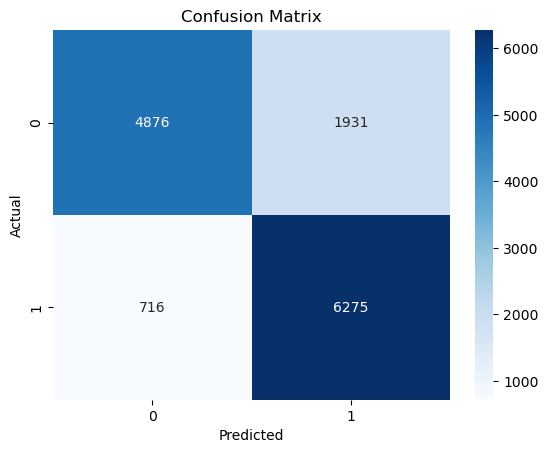

Negative Predictive Value (NPV): 0.8719599427753935


In [66]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
NPV = TN / (TN + FN) if (TN + FN) != 0 else 0
print(f"Negative Predictive Value (NPV): {NPV}")

log reg

In [67]:
logistic_regression = LogisticRegression(C=0.1, solver='liblinear', random_state=42)

logistic_regression.fit(X_train, y_train)


LogisticRegression(C=0.1, random_state=42, solver='liblinear')

Accuracy: 0.6325554428177996
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      6807
           1       0.64      0.64      0.64      6991

    accuracy                           0.63     13798
   macro avg       0.63      0.63      0.63     13798
weighted avg       0.63      0.63      0.63     13798



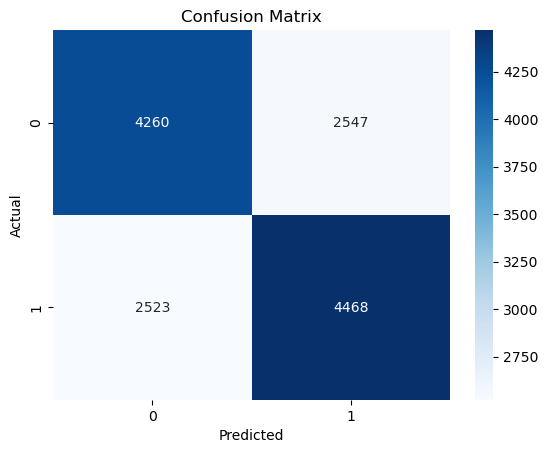

Negative Predictive Value (NPV): 0.6280406899601946


In [68]:
y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
NPV = TN / (TN + FN) if (TN + FN) != 0 else 0
print(f"Negative Predictive Value (NPV): {NPV}")

adaboost

In [69]:
adaboost_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

adaboost_classifier.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

Accuracy: 0.6369038991158139
              precision    recall  f1-score   support

           0       0.65      0.56      0.60      6807
           1       0.62      0.71      0.66      6991

    accuracy                           0.64     13798
   macro avg       0.64      0.64      0.63     13798
weighted avg       0.64      0.64      0.63     13798



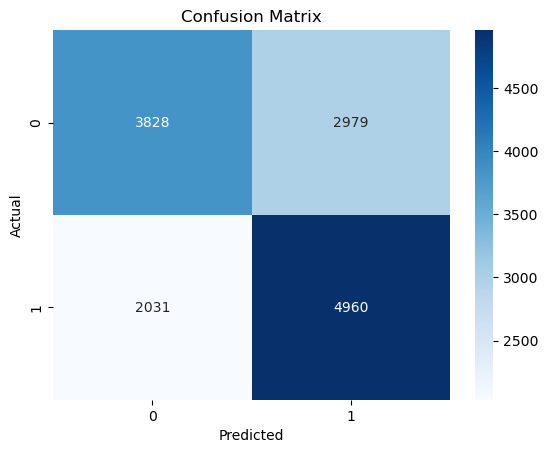

Negative Predictive Value (NPV): 0.6533538146441372


In [70]:
y_pred = adaboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
NPV = TN / (TN + FN) if (TN + FN) != 0 else 0
print(f"Negative Predictive Value (NPV): {NPV}")

catboost

In [71]:
catboost_classifier = CatBoostClassifier(
    n_estimators=50, 
    learning_rate=0.1, 
    verbose=0,
    random_state=42
)

catboost_classifier.fit(X_train, y_train)


Accuracy: 0.6387882301782867
              precision    recall  f1-score   support

           0       0.66      0.56      0.61      6807
           1       0.63      0.71      0.67      6991

    accuracy                           0.64     13798
   macro avg       0.64      0.64      0.64     13798
weighted avg       0.64      0.64      0.64     13798



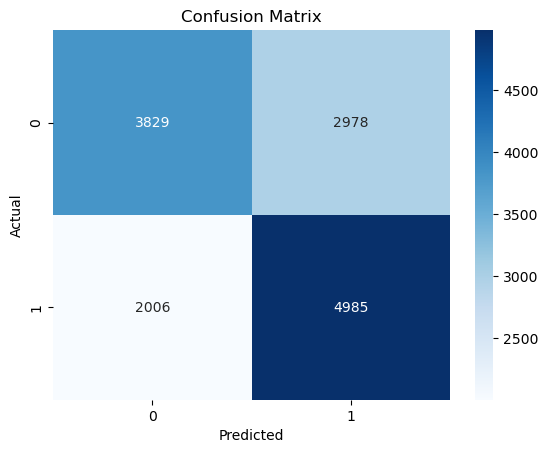

Negative Predictive Value (NPV): 0.6562125107112253


In [72]:
y_pred = catboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
NPV = TN / (TN + FN) if (TN + FN) != 0 else 0
print(f"Negative Predictive Value (NPV): {NPV}")